### Import necessary libraries


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Your paths
train_data_dir = 'train3_imagesfixed_category'
test_data_dir = 'test3_imagesfixed_category'

# Your parameters
img_width, img_height = 224, 224
batch_size = 32
num_classes = 44
epochs = 100
dropout_rate = 0.5  # added dropout rate

# Data generators with more augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,  # added rotation
    width_shift_range=0.2,  # added width shift
    height_shift_range=0.2,  # added height shift
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the model with dropout
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(dropout_rate)(x)  # added dropout
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Added learning rate schedule callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[reduce_lr]  # added learning rate schedule callback
)

Found 3610 images belonging to 44 classes.
Found 1600 images belonging to 44 classes.
Epoch 1/100
 36/112 [========>.....................] - ETA: 1:15 - loss: 3.6454 - accuracy: 0.1632

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


112/112 [==============================] - 179s 1s/step - loss: 2.5894 - accuracy: 0.3807 - val_loss: 1.2267 - val_accuracy: 0.7000 - lr: 0.0010
Epoch 2/100
112/112 [==============================] - 52s 466ms/step - loss: 1.3227 - accuracy: 0.6476 - val_loss: 0.8929 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 3/100
112/112 [==============================] - 52s 463ms/step - loss: 1.0346 - accuracy: 0.7127 - val_loss: 0.8019 - val_accuracy: 0.7812 - lr: 0.0010
Epoch 4/100
112/112 [==============================] - 52s 463ms/step - loss: 0.9264 - accuracy: 0.7342 - val_loss: 0.7559 - val_accuracy: 0.7894 - lr: 0.0010
Epoch 5/100
112/112 [==============================] - 52s 464ms/step - loss: 0.8174 - accuracy: 0.7599 - val_loss: 0.7310 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 6/100
112/112 [==============================] - 51s 454ms/step - loss: 0.7708 - accuracy: 0.7851 - val_loss: 0.7470 - val_accuracy: 0.7950 - lr: 0.0010
Epoch 7/100
112/112 [==============================] - 51s 4

112/112 [==============================] - 49s 441ms/step - loss: 0.3796 - accuracy: 0.8807 - val_loss: 0.8488 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 53/100
112/112 [==============================] - 50s 445ms/step - loss: 0.3988 - accuracy: 0.8762 - val_loss: 0.8669 - val_accuracy: 0.7906 - lr: 0.0010
Epoch 54/100
112/112 [==============================] - 50s 445ms/step - loss: 0.4160 - accuracy: 0.8726 - val_loss: 0.8296 - val_accuracy: 0.8019 - lr: 0.0010
Epoch 55/100
112/112 [==============================] - 50s 444ms/step - loss: 0.4240 - accuracy: 0.8667 - val_loss: 0.8415 - val_accuracy: 0.7881 - lr: 0.0010
Epoch 56/100
112/112 [==============================] - 50s 450ms/step - loss: 0.4102 - accuracy: 0.8709 - val_loss: 0.8724 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 57/100
112/112 [==============================] - 50s 450ms/step - loss: 0.4383 - accuracy: 0.8642 - val_loss: 0.8877 - val_accuracy: 0.7887 - lr: 0.0010
Epoch 58/100
112/112 [==============================]

### Define paths and parameters

In [38]:
train_data_dir = 'train3_imagesfixed_category'
test_data_dir = 'test3_imagesfixed_category'
img_width, img_height = 224, 224  # Image dimensions for MobileNetV2
batch_size = 32  # depends on your machine's memory capacity
num_classes = 44  # number of output classes
epochs = 100  # number of training epochs

### Reshaping images


In [39]:
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Defining MobileNetV2 model


In [40]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)  # pre-trained on ImageNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()



NameError: name 'Dropout' is not defined

### Augmentation configuration for training & testing

In [23]:
# Augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Augmentation configuration for testing (just rescaling)
test_datagen = ImageDataGenerator(rescale=1. / 255)

### Generators for training

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Get the class indices
class_indices = train_generator.class_indices

# Print the number of images per category
for class_name, class_index in class_indices.items():
    num_images = len(train_generator.labels[train_generator.labels == class_index])
    print(f"Category: {class_name}, Number of Images: {num_images}")


Found 3500 images belonging to 44 classes.
Found 1500 images belonging to 44 classes.
Category: airplane, Number of Images: 231
Category: banana, Number of Images: 41
Category: bear, Number of Images: 126
Category: bed, Number of Images: 62
Category: bench, Number of Images: 76
Category: bird, Number of Images: 193
Category: boat, Number of Images: 77
Category: broccoli, Number of Images: 41
Category: bus, Number of Images: 32
Category: cake, Number of Images: 23
Category: car, Number of Images: 26
Category: cat, Number of Images: 66
Category: cell phone, Number of Images: 23
Category: clock, Number of Images: 196
Category: cow, Number of Images: 145
Category: dog, Number of Images: 66
Category: donut, Number of Images: 39
Category: elephant, Number of Images: 171
Category: fire hydrant, Number of Images: 77
Category: giraffe, Number of Images: 234
Category: horse, Number of Images: 109
Category: hot dog, Number of Images: 12
Category: kite, Number of Images: 27
Category: laptop, Numbe

### Generators for testing

In [25]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Get the class indices
class_indices = test_generator.class_indices

# Print the number of images per category
for class_name, class_index in class_indices.items():
    num_images = len(test_generator.labels[test_generator.labels == class_index])
    print(f"Category: {class_name}, Number of Images: {num_images}")


Found 1500 images belonging to 44 classes.
Category: airplane, Number of Images: 83
Category: banana, Number of Images: 18
Category: bear, Number of Images: 36
Category: bed, Number of Images: 21
Category: bench, Number of Images: 33
Category: bird, Number of Images: 96
Category: boat, Number of Images: 30
Category: broccoli, Number of Images: 15
Category: bus, Number of Images: 12
Category: cake, Number of Images: 6
Category: car, Number of Images: 11
Category: cat, Number of Images: 33
Category: cell phone, Number of Images: 9
Category: clock, Number of Images: 106
Category: cow, Number of Images: 51
Category: dog, Number of Images: 32
Category: donut, Number of Images: 21
Category: elephant, Number of Images: 73
Category: fire hydrant, Number of Images: 34
Category: giraffe, Number of Images: 106
Category: horse, Number of Images: 44
Category: hot dog, Number of Images: 5
Category: kite, Number of Images: 14
Category: laptop, Number of Images: 3
Category: motorcycle, Number of Image

### Train images preview

In [1]:
# Preview images from the train dataset
train_images, train_labels = next(train_generator)
train_class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i])
    plt.title(f"Train: {train_class_names[np.argmax(train_labels[i])]}")
    plt.axis('off')
plt.show()


NameError: name 'train_generator' is not defined

### Test images preview

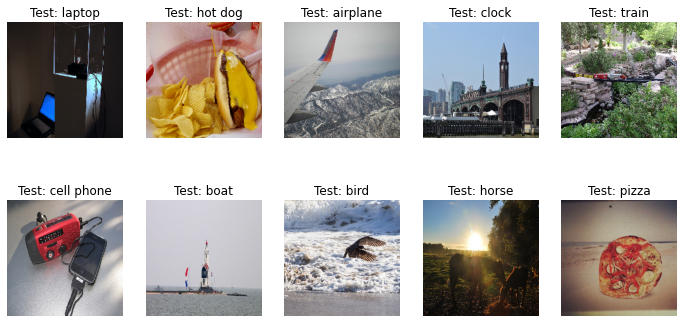

In [27]:
# Preview images from the test dataset
test_images, test_labels = next(test_generator)
test_class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Test: {test_class_names[np.argmax(test_labels[i])]}")
    plt.axis('off')
plt.show()


### Training the model

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/100
109/109 [==============================] - 80s 558ms/step - loss: 1.8078 - accuracy: 0.5732 - val_loss: 1.0512 - val_accuracy: 0.7235
Epoch 2/100
109/109 [==============================] - 44s 399ms/step - loss: 0.7158 - accuracy: 0.8103 - val_loss: 0.8713 - val_accuracy: 0.7534
Epoch 3/100
109/109 [==============================] - 44s 399ms/step - loss: 0.5253 - accuracy: 0.8547 - val_loss: 0.7996 - val_accuracy: 0.7779
Epoch 4/100
109/109 [==============================] - 43s 396ms/step - loss: 0.4135 - accuracy: 0.8884 - val_loss: 0.7600 - val_accuracy: 0.7846
Epoch 5/100
109/109 [==============================] - 43s 396ms/step - loss: 0.3411 - accuracy: 0.9106 - val_loss: 0.7667 - val_accuracy: 0.7887
Epoch 6/100
109/109 [==============================] - 43s 396ms/step - loss: 0.2977 - accuracy: 0.9164 - val_loss: 0.7895 - val_accuracy: 0.7758
Epoch 7/100
109/109 [==============================] - 43s 396ms/step - loss: 0.2420 - accuracy: 0.9397 - val_loss: 0.7736 -

Epoch 57/100
109/109 [==============================] - 43s 397ms/step - loss: 0.0252 - accuracy: 0.9937 - val_loss: 1.1324 - val_accuracy: 0.7724
Epoch 58/100
109/109 [==============================] - 44s 400ms/step - loss: 0.0178 - accuracy: 0.9968 - val_loss: 1.0519 - val_accuracy: 0.7663
Epoch 59/100
109/109 [==============================] - 43s 396ms/step - loss: 0.0163 - accuracy: 0.9974 - val_loss: 1.0919 - val_accuracy: 0.7717
Epoch 60/100
109/109 [==============================] - 44s 400ms/step - loss: 0.0201 - accuracy: 0.9968 - val_loss: 1.0816 - val_accuracy: 0.7731
Epoch 61/100
109/109 [==============================] - 43s 399ms/step - loss: 0.0164 - accuracy: 0.9980 - val_loss: 1.1148 - val_accuracy: 0.7697
Epoch 62/100
109/109 [==============================] - 43s 398ms/step - loss: 0.0162 - accuracy: 0.9974 - val_loss: 1.0778 - val_accuracy: 0.7717
Epoch 63/100
109/109 [==============================] - 44s 402ms/step - loss: 0.0144 - accuracy: 0.9986 - val_loss: 1

### Testing the model on new data


In [9]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)
print("Test accuracy:", test_acc)

<ipython-input-9-e520890fcdf3>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // batch_size)


Test accuracy: 0.7931249737739563


### Plotting the training history


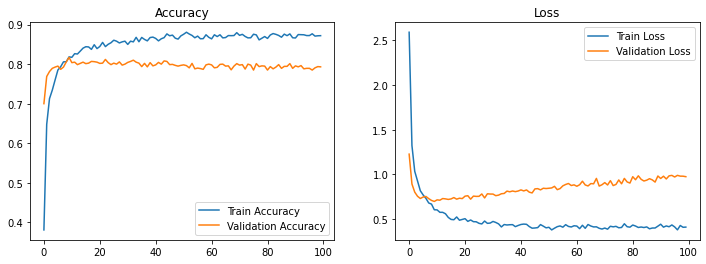

In [7]:
# Plotting the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

### Display a batch of images from the trained set


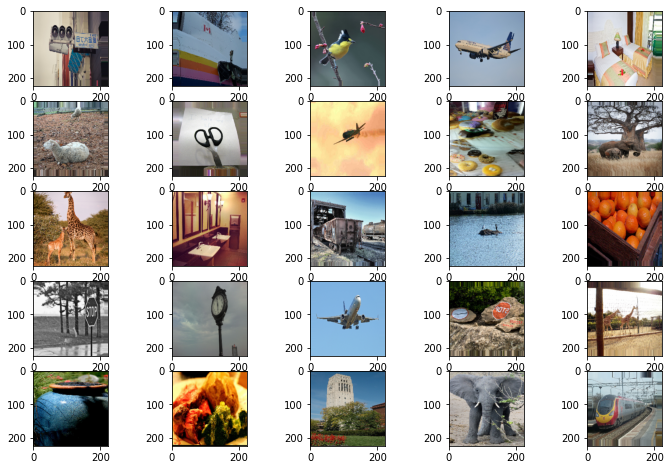

In [33]:
x_batch, y_batch = next(train_generator)

fig = plt.figure(figsize=(12, 8))
for i in range(0, min(25, x_batch.shape[0])):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(x_batch[i])
plt.show()

### Image classification on new data

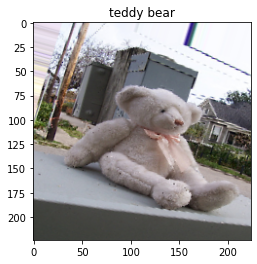

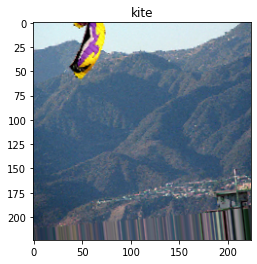

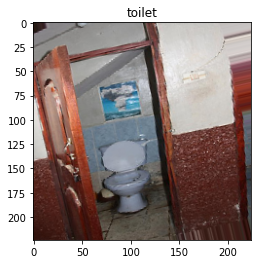

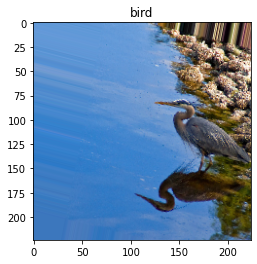

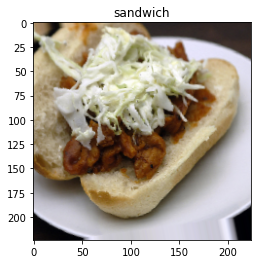

In [50]:
# Get a batch of images and labels
x_batch, y_batch = next(train_generator)

# Get a mapping from class names to class indices
class_names = list(train_generator.class_indices.keys())
class_indices = list(train_generator.class_indices.values())
class_map = dict(zip(class_indices, class_names))

# Display images with class names
for i in range(0, 5):
    image = x_batch[i]
    label_index = y_batch[i].argmax()  # one-hot encoded, take argmax to get index
    label_name = class_map[label_index]
    plt.imshow(image)
    plt.title(label_name)
    plt.show()


## Save model into h5 format

In [4]:
model.save('model5.h5')

### Convert into a TFlite model

In [5]:
# Convert the model to the TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
with open('model5.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpdxcskr64\assets
